# Data Handling (I/O)
## PyIU Python Workshop

Authors: Brandon Radzom, Robert Howard

Last Modified: 10/18/2024

## Type Ia Supernovae (SNe Ia)

- This data handling demo will feature analysis of a Type 1a supernova light curve (light curve = brightness over time). These massive explosions occur when a white dwarf (small remnant of a main-sequence star) that's in a binary system with another star accretes enough matter from its companion to reach a certain mass threshold (1.4 times the mass of the Sun), at which point the white dwarf explodes in a type Ia supernova!
<br></br>
- The pictures below depict an artist's rendering of a white dwarf accreting matter from its binary companion, as well as an SN Ia remnant called G299.2-2.9 (creative name, right?). (Image credits: NASA/CXC/U.Texas, NASA/SVS)
<br></br>
- SNe Ia peak in brightness very quickly and then slowly grow fainter. A graph of how the brightness of a supernova changes over time is called a light curve, and we know nearly enough Python to make our own light curve using the data we just imported!

<table><tr>
<td> <img src="white_dwarf_accretion.jpg" alt="Artist's conception of a white dwarf accreting from another star" style="width: 400px;"/> </td>
<td> <img src="sn_ia_remnant.jpg" alt="SN Ia remnant" style="width: 400px;"/> </td>
</tr></table>

## Modules

- `numpy` (commonly abbreviated `np` when importing) is a go-to module for all things data handling. File input/output, manipulating arrays, basic (and not-so-basic) mathematical functions, `numpy` does it all.
- `pandas` (commonly abbreviated `pd` when importing) is better than `numpy` for complex operations with tables. `numpy` works well enough for simple applications, and it's convenient having so many features in a single module, but if you need to do something with a table and can't find a `numpy` function for it, `pandas` is the next place to look. It also has ways to display tables in Jupyter Notebooks professionally.
- `matplotlib` (commonly abbreviated `plt` when importing) is a go-to module for all things plotting. It gives you control over every aspect of the plot you can imagine, from simple features like data plotting, axis labels, plot titles, and legends, to more detailed features like subplots, inset plots, axis label formatting, colormaps, and so much more.
    - The sublibrary you want to import, specifically, is `matplotlib.pyplot`. The more general `matplotlib` contains all kinds of fantastical and scary features that we don't need for simple plotting.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Built-in Functions for File Input/Output

Python has built-in functions for file input and output (I/O): `open()`, `close()`, `read()`, and `readlines()`. While these functions can be a bit tedious to work with, they are the most fundamental methods to read and write to files, and are a failsafe for complex file formats that aren't recognized by the numpy and pandas functions below. Let's begin by reading in the light curve data for the supernova event.


We can use `open()` to access and assign the file to a variable. Then, we can read and save its contents using `read()`. Note that it is good practice to close a file using `close()` once you've saved its data to some variable.

In [ ]:
# access the supernova light curve data using open()
sn_data_file = open('supernova_data.txt', 'r')

# read in the data using read()
sn_data = sn_data_file.read()

# close the file using close()
sn_data_file.close()

# print the first 100 characters of supernova data out
print('Supernova light curve data:')
print(sn_data[:100])

Supernova light curve data:
2457822.70568 16.009
2457822.70846 15.997
2457826.64743 13.742
2457826.64895 13.736
2457827.55460 13


Note that the `read()` function simply reads **all** characters in a file and stores them in a `string` variable. Usually, we want to access delimited data in a file- that is, data in rows and columns separated by some common delimiter like a comma, tab, or whitespace. As we can see by printing out our two files above, the data consists of two columns of decimal numbers. In fact, the first column corresponds to time measured as the Julian Date (JD) and the second column corresponds to the *g*-band magnitude (brightness) of the supernova.  


Since we want the brightness over time, we need a way to separate data from different time stamps, or rows in the file. The `readlines()` function can be used in conjunction with a `while` loop for this prupose, but is actually more straightforward to make use of a `with` statement here. The difference between reading a file with `with` and `open()` is described in more detail here: https://www.freecodecamp.org/news/with-open-in-python-with-statement-syntax-example/. Briefly, the key advantages of using `with` are:
1. Python will automatically close the file after the statement is executed.
2. We can directly iterate over each row or new line in the file using a `for` loop.


In [ ]:
# initialize an empty list to contain the data
sn_data = []
with open("supernova_data.txt") as my_file:
    for line in my_file:
        sn_data.append(line) # append the data to the list

    # note that the file is automatically closed after the "with" statement is executed fully
print(sn_data)

['2457822.70568 16.009\n', '2457822.70846 15.997\n', '2457826.64743 13.742\n', '2457826.64895 13.736\n', '2457827.55460 13.398\n', '2457827.55610 13.419\n', '2457827.64479 13.384\n', '2457827.64630 13.383\n', '2457828.63708 13.079\n', '2457828.63860 13.078\n', '2457829.83431 12.821\n', '2457829.83581 12.810\n', '2457831.64549 12.395\n', '2457831.64699 12.387\n', '2457833.85273 12.138\n', '2457833.85372 12.130\n', '2457836.63937 11.917\n', '2457836.64036 11.893\n', '2457839.38552 11.762\n', '2457839.38652 11.713\n', '2457840.27816 11.728\n', '2457840.27914 11.727\n', '2457841.34758 11.803\n', '2457842.51255 11.689\n', '2457842.51355 11.694\n', '2457843.34830 11.731\n', '2457843.34929 11.728\n', '2457844.56626 11.726\n', '2457844.56725 11.734\n', '2457845.52591 11.757\n', '2457845.52692 11.757\n', '2457846.54853 11.811\n', '2457846.54954 11.820\n', '2457847.55192 11.836\n', '2457847.55292 11.837\n', '2457849.64828 12.014\n', '2457849.64926 12.020\n', '2457850.59940 12.079\n', '2457850.60

We are almost ready to analyze this data, as we have saved each row as a list element. First, we need to create separate lists to store the times (JD) and the magnitudes, which are currently jointly stored in each element of the `sn_data` list.

We can use Python's built-in `split()` function to separately access the times and mangitudes, which we can see through the above print statements are separated by whitespace. `split()` works by splitting a `string` into multiple items based on some common delimiter (for example, whitespace) that is supplied by the user. It then returns a list containing the `strings` that were split by that delimiter.

In [ ]:
# loop through all the lines of data and split each row by whitespace
# then save times and magnitudes separetely
sn_times = []
sn_mags = []
for i in range(len(sn_data)-1): # skip the last row, which is actually empty
  # split the row, save to split_list
  split_list = sn_data[i].split(" ")
  # extract the times (first element), append to sn_times
  sn_times.append(split_list[0])
  # extract the magnitudes (second element), append to sn_mags
  sn_mags.append(split_list[1])

# print the result
print('Times:',sn_times)
print('Magnitudes:',sn_mags)

Times: ['2457822.70568', '2457822.70846', '2457826.64743', '2457826.64895', '2457827.55460', '2457827.55610', '2457827.64479', '2457827.64630', '2457828.63708', '2457828.63860', '2457829.83431', '2457829.83581', '2457831.64549', '2457831.64699', '2457833.85273', '2457833.85372', '2457836.63937', '2457836.64036', '2457839.38552', '2457839.38652', '2457840.27816', '2457840.27914', '2457841.34758', '2457842.51255', '2457842.51355', '2457843.34830', '2457843.34929', '2457844.56626', '2457844.56725', '2457845.52591', '2457845.52692', '2457846.54853', '2457846.54954', '2457847.55192', '2457847.55292', '2457849.64828', '2457849.64926', '2457850.59940', '2457850.60038', '2457851.58946', '2457851.59044', '2457852.61233', '2457852.61331', '2457853.62464', '2457853.62565', '2457854.62324', '2457854.62422', '2457855.65649', '2457855.65748', '2457856.71367', '2457856.71464', '2457857.73727', '2457857.73825', '2457858.77205', '2457858.77303', '2457859.95302', '2457859.95401', '2457861.17093', '24578

Now we can see that we have a list of times and a list of magnitudes, but there are two small issues. First, the elements in these arrays, which are decimal numbers, are still of the `string` type, but we want to analyze them quantitatively, so we need to convert them to `float` types. Second, we can see there is a strange `\n` character tacked onto the end of each magnitude. This actually represents the new line or "Enter" key that tells file readers to display the next data on a new line! We can get rid of it by deleting the last two characters of each magnitude string or using the built-in `replace()` command to replace `\n` with an empty `string`. Let's try the latter technique!

In [ ]:
for i in range(len(sn_times)):
  # convert times to float
  sn_times[i] = float(sn_times[i])
  # replace \n with empty string
  sn_mags[i] = sn_mags[i].replace("\n","")
  # then convert mags to flaot
  sn_mags[i] = float(sn_mags[i])
# print the result
print('Times:',sn_times)
print('Magnitudes:',sn_mags)

Times: [2457822.70568, 2457822.70846, 2457826.64743, 2457826.64895, 2457827.5546, 2457827.5561, 2457827.64479, 2457827.6463, 2457828.63708, 2457828.6386, 2457829.83431, 2457829.83581, 2457831.64549, 2457831.64699, 2457833.85273, 2457833.85372, 2457836.63937, 2457836.64036, 2457839.38552, 2457839.38652, 2457840.27816, 2457840.27914, 2457841.34758, 2457842.51255, 2457842.51355, 2457843.3483, 2457843.34929, 2457844.56626, 2457844.56725, 2457845.52591, 2457845.52692, 2457846.54853, 2457846.54954, 2457847.55192, 2457847.55292, 2457849.64828, 2457849.64926, 2457850.5994, 2457850.60038, 2457851.58946, 2457851.59044, 2457852.61233, 2457852.61331, 2457853.62464, 2457853.62565, 2457854.62324, 2457854.62422, 2457855.65649, 2457855.65748, 2457856.71367, 2457856.71464, 2457857.73727, 2457857.73825, 2457858.77205, 2457858.77303, 2457859.95302, 2457859.95401, 2457861.17093, 2457861.17191, 2457862.30045, 2457862.30146, 2457863.3361, 2457864.45804, 2457865.62355, 2457865.62454, 2457867.51582, 2457867.6

We now have two lists with the time and magnitude of the supernova event, all stored as `float` values. Let's plot this supernova lightcurve to see how the brightness sharply increases, then decays over time.

Reminders for `matplotlib`:
- The most basic functions you'll need here are `plt.plot(x_array, y_array)`, `plt.scatter(array)`, and `plt.show()`. The effects of those functions are pretty obvious once you see them in action &mdash; the first one plots your data, and the second one displays the plot.
- `plt.scatter()` and `plt.plot()` take a 1-D array of x values and a 1-D array of y values, which we already have prepared

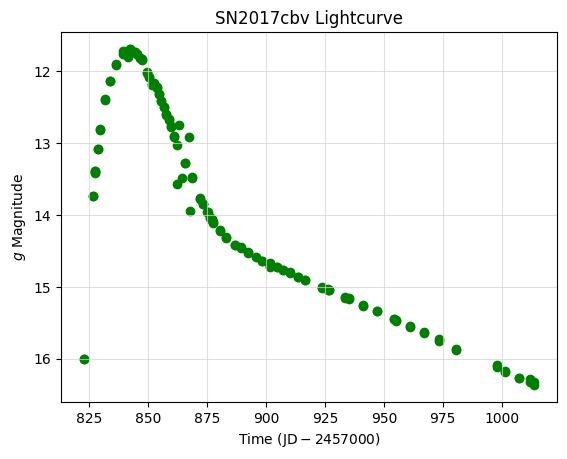

In [ ]:
# subtract this normalization for the time so the time axis is more readable
t = 2457000
sn_times_norm = []
for time in range(len(sn_times)):
  sn_times_norm.append(sn_times[time] - t)
plt.scatter(sn_times_norm, sn_mags, color = 'green')
plt.gca().invert_yaxis() # Brighter objects have lower magnitudes, so it's customary to invert axes that use magnitudes
plt.title('SN2017cbv Lightcurve')
plt.xlabel(r'Time ($\rm{JD}-2457000$)')
plt.ylabel(r'$g$ Magnitude')
plt.grid(color = 'lightgray', alpha = 0.7)
# plt.savefig('sn2017cbv_lc.png') # Saves the plot as a .png file, optional
plt.show()

## Advanced File Input/Output with `numpy` and `pandas`

Now let's try to use some more advanced tools for file reading. For this section, we will need to utilize functions from the external `numpy` and `pandas` packages, rather than built-in functions. Specifically, we will use:

- `np.loadtxt(filename)` is the quickest and easiest way to get your data in a workable format. It's smarter than the default Python `with open(filename) as f` statement in a number of ways, automatically separating different columns and reading in numbers as floats instead of strings by default.
    - Similarly, `np.savetxt(filename, array)` lets you write a `numpy` array to an output file.
- `pd.read_csv(filename)` is a better option for large tables with lots of columns. It allows you to name the columns, which makes them much easier to keep track of than having to remember which index goes with which column. And, as mentioned above, `pandas` has all kinds of functionality for doing complicated, data-science-related things with tables.

In [ ]:
# read in data with numpy.loadtxt() function
sn_data = np.loadtxt('supernova_data.txt')

# print out the first 5 rows
print(sn_data[:5])

[[2.45782271e+06 1.60090000e+01]
 [2.45782271e+06 1.59970000e+01]
 [2.45782665e+06 1.37420000e+01]
 [2.45782665e+06 1.37360000e+01]
 [2.45782755e+06 1.33980000e+01]]


All we have to do is slice the data to separate out the times and magnitudes, and then we are ready to plot the light curve! We are also going to read in data (`supernova_fit.txt`) from a best-fit curve that has been computed for the initial rise and drop, and perform the same slicing.

In [ ]:
# read in data with numpy.loadtxt() function
sn_fit = np.loadtxt('supernova_fit.txt')

# slice the data and the fit to separate times and magnitudes
sndata_times = sn_data[:,0]
sndata_mags = sn_data[:,1]
snfit_times = sn_fit[:,0]
snfit_mags = sn_fit[:,1]

Now we plot the supernova data agains the model light curve. Since the data are read in as `numpy` arrays, we can subtract the normalization time `t=2457000` from each element without writing a `for` loop.

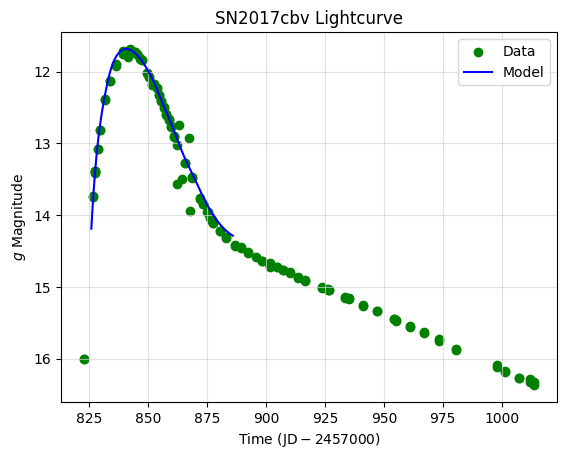

In [ ]:
plt.scatter(sndata_times-t, sndata_mags, color = 'green') # data in green
plt.plot(snfit_times-t, snfit_mags, color = 'blue') # model in blue
plt.gca().invert_yaxis() # Brighter objects have lower magnitudes, so it's customary to invert axes that use magnitudes
plt.title('SN2017cbv Lightcurve')
plt.xlabel(r'Time ($\rm{JD}-2457000$)')
plt.ylabel(r'$g$ Magnitude')
plt.grid(color = 'lightgray', alpha = 0.7)
plt.legend(['Data', 'Model'])
# plt.savefig('sn2017cbv_lc.png') # Saves the plot as a .png file, optional
plt.show()

Finally, we will read in these data using `pandas`, which will save the data as a `DataFrame` object rather than a `numpy` array. DataFrames are like tables, and are the best way to organize lots of rows of data with many columns. The `pandas.read_csv()` function is generally smart enough to detect the delimited of the file, even if values are not comman-separated.

In [ ]:
sn_data = pd.read_csv('supernova_data.txt', sep = ' ', names = ['Time (JD)', 'g Mag'])
sn_fit = pd.read_csv('supernova_fit.txt', sep = ' ', names = ['Time (JD)', 'g Mag'])

# output first 10 rows of pandas DataFrame
sn_data[:10]

,Time (JD),g Mag
0,2.457823e+06,16.009
1,2.457823e+06,15.997
2,2.457827e+06,13.742
3,2.457827e+06,13.736
4,2.457828e+06,13.398
5,2.457828e+06,13.419
6,2.457828e+06,13.384
7,2.457828e+06,13.383
8,2.457829e+06,13.079
9,2.457829e+06,13.078


Remember that  `plt.plot()` takes a 1-D array of x values and a 1-D array of y values, but our data are stored in two 2-D arrays within their DataFrames. To split up those 2-D arrays, we can use the column names we assigned to access the times and magnitudes separately.

In [ ]:
sndata_times = sn_data['Time (JD)']
sndata_mags = sn_data['g Mag']
snfit_times = sn_fit['Time (JD)']
snfit_mags = sn_fit['g Mag']

Let's plot our data that we read in with `pandas`!

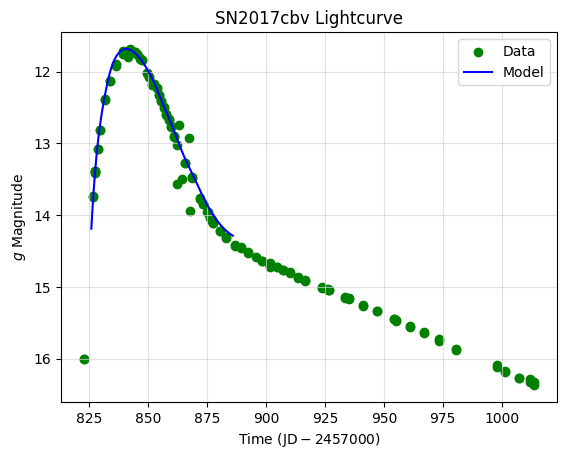

In [ ]:
plt.scatter(sndata_times-t, sndata_mags, color = 'green') # data in green
plt.plot(snfit_times-t, snfit_mags, color = 'blue') # model in blue
plt.gca().invert_yaxis() # Brighter objects have lower magnitudes, so it's customary to invert axes that use magnitudes
plt.title('SN2017cbv Lightcurve')
plt.xlabel(r'Time ($\rm{JD}-2457000$)')
plt.ylabel(r'$g$ Magnitude')
plt.grid(color = 'lightgray', alpha = 0.7)
plt.legend(['Data', 'Model'])
# plt.savefig('sn2017cbv_lc.png') # Saves the plot as a .png file, optional
plt.show()

And that's that! For more resources, check out these documentation pages, as well as the included cheat sheets:
- Numpy: https://numpy.org/doc/stable/reference/
- Pandas: https://pandas.pydata.org/docs/reference/index.html
- Matplotlib: https://matplotlib.org/stable/api/pyplot_summary.html

The documentation can be a little dense and overwhelming if you're looking for something specific, though, so a good approach can be just to Google "[module name] [thing you want to learn more about]," and that will provide more immediately helpful results.